## Introduction

In this tutorial, we demonstrate how to extract the outputs of learned cellular dynamics fro TIGON. Here we use EMT dataset as an example.  


In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

import sys
sys.path.append('Path to utility.py')
from utility import *



In [2]:
args = create_args()

Name of the data set. Options: EMT; Lineage; Bifurcation; Simulation (default: EMT): 
Time points of data (default: 0, 0.1, 0.3, 0.9, 2.1): 
Number of training iterations (default: 5000): 
Learning rate (default: 3e-3): 
Number of sampling points per epoch (default: 100): 
Dimension of the hidden layer (default: 16): 
Number of hidden layers (default: 4): 
Activation function (default: Tanh): 
GPU device index (default: 0): 
Input Files Directory (default: Input/): 
Output Files Directory (default: Output/): 
Random seed (default: 1): 


In [3]:
torch.enable_grad()
random.seed(args.seed)
torch.manual_seed(args.seed)

device = torch.device('cuda:' + str(args.gpu)
                        if torch.cuda.is_available() else 'cpu')
# load dataset
data_train = loaddata(args,device)
integral_time = args.timepoints

time_pts = range(len(data_train))
leave_1_out = []
train_time = [x for i,x in enumerate(time_pts) if i!=leave_1_out]


# model
func = UOT(in_out_dim=data_train[0].shape[1], hidden_dim=args.hidden_dim,n_hiddens=args.n_hiddens,activation=args.activation).to(device)

# load trained networks
if args.save_dir is not None:
    if not os.path.exists(args.save_dir):
        os.makedirs(args.save_dir)
    ckpt_path = os.path.join(args.save_dir, 'ckpt_EMT.pth')
    if os.path.exists(ckpt_path):
        checkpoint = torch.load(ckpt_path,map_location=torch.device('cpu'))
        func.load_state_dict(checkpoint['func_state_dict'])
        print('Loaded ckpt from {}'.format(ckpt_path))


Loaded ckpt from Output/ckpt_EMT.pth


### Generate the plot of regulatory matrix
Plot avergae regulatory matrices of cells (z_t) at time (time_pt).

Here we use first time points as an examples

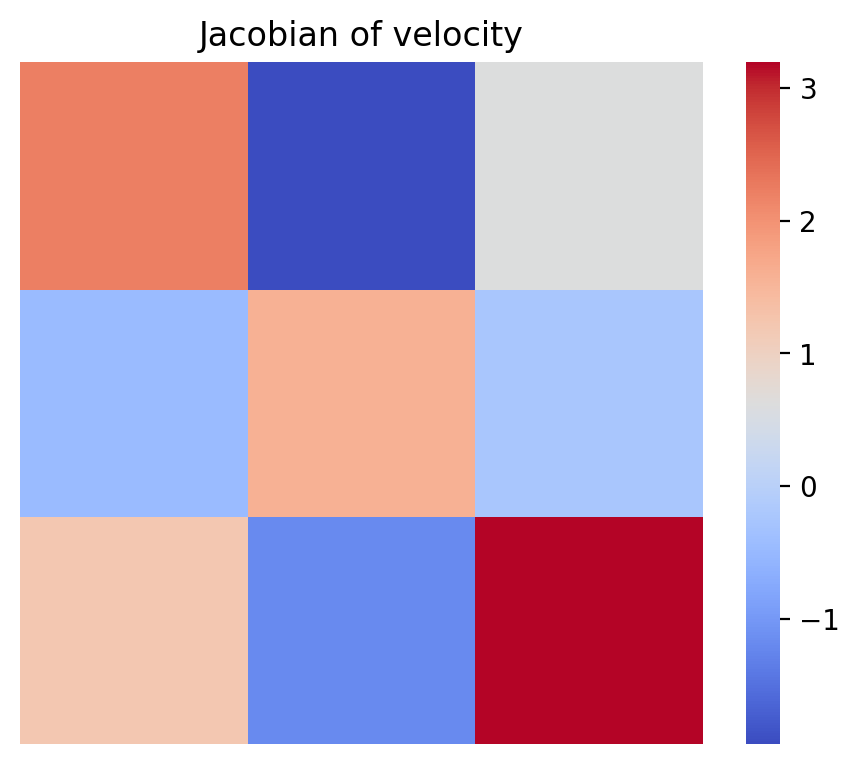

In [4]:
time_pt = 0
z_t = data_train[time_pt]
plot_jac_v(func,z_t,time_pt,'Average_jac_d0.pdf',['UMAP1','UMAP1','UMAP1'],args,device)

### Generate the plot of gradient of growth
Plot avergae gradients of g of cells (z_t) at time (time_pt).

Here we use first time points as an examples

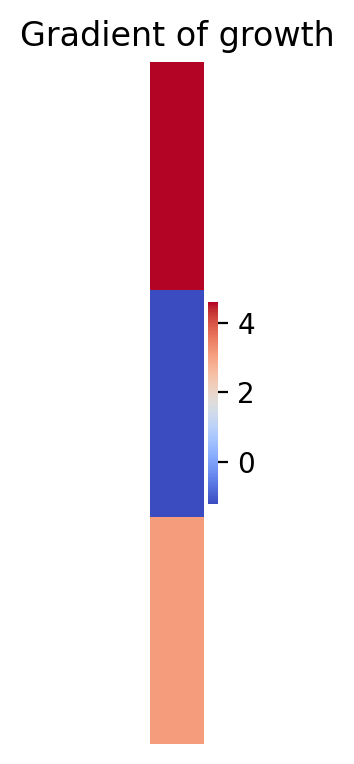

In [5]:
time_pt = 0
z_t = data_train[time_pt]
plot_grad_g(func,z_t,time_pt,'Average_grad_d0.pdf',['UMAP1','UMAP1','UMAP1'],args,device)

### Generate the plot of trajecotry
Plot 3-dmensional plot of inferred trajectories of 20 cells

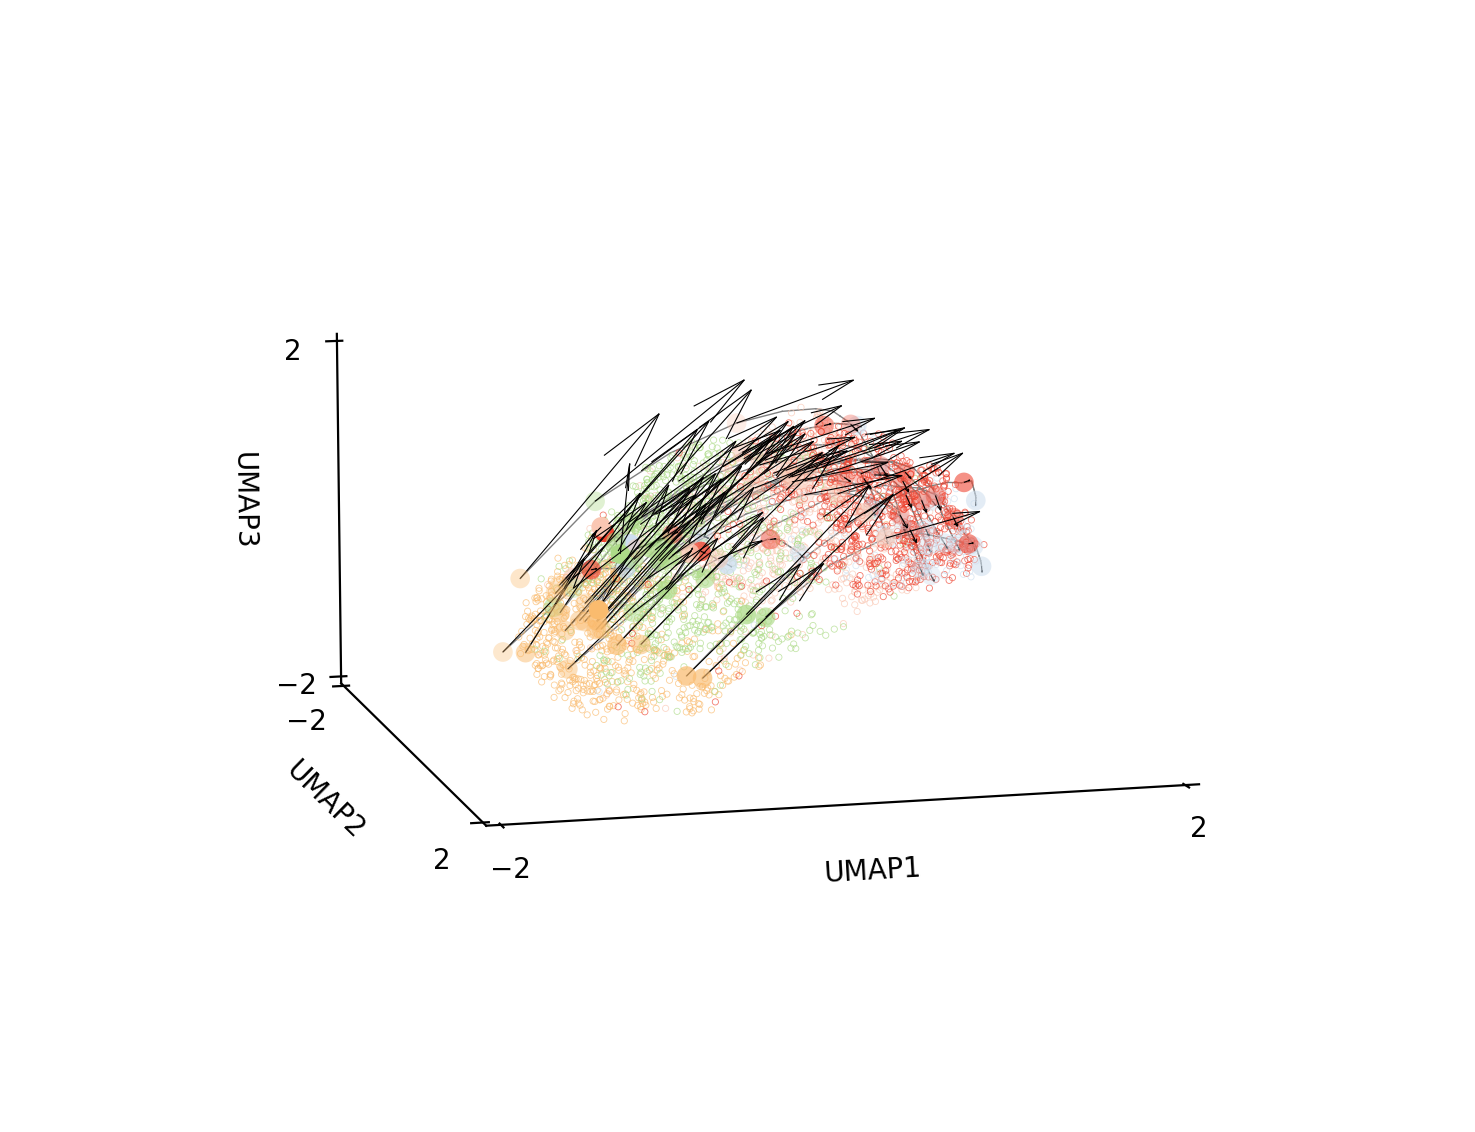

In [6]:
plot_3d(func,data_train,train_time,integral_time,args,device)